In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
#load & inspect user data
df_user = pd.read_csv('takehome_users.csv',engine='python')
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
#date conversions
df_user['creation_time_date'] = pd.to_datetime(df_user['creation_time'], errors='coerce').dt.floor('d')
df_user['last_session_creation_date'] = pd.to_datetime(df_user['last_session_creation_time'],unit='s')

#Calculate numbers of days between a user created and user's last login
df_user['days_between_creation_and_lastsession']=(df_user['last_session_creation_date'] - df_user['creation_time_date']).dt.days
df_user.loc[df_user['days_between_creation_and_lastsession'].isna(),'days_between_creation_and_lastsession']=0

#Create a column for whether a user was invited by a guest or not
df_user['invited'] = df_user['invited_by_user_id'].notnull()

In [5]:
df_user.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_date,last_session_creation_date,days_between_creation_and_lastsession,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22,2014-04-22 03:53:30,0.0,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15,2014-03-31 03:45:04,136.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19,2013-03-19 23:14:52,0.0,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-21,2013-05-22 08:09:28,1.0,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-17,2013-01-22 10:14:20,5.0,True
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,2013-12-17,2013-12-19 03:37:06,2.0,True
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,2012-12-16,2012-12-20 13:24:32,4.0,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,2013-07-31,NaT,0.0,False
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,2013-11-05,NaT,0.0,False
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013-01-16,2014-06-03 22:08:03,503.0,True


In [6]:
#load & inspect user engagement data
df_user_eng = pd.read_csv('takehome_user_engagement.csv',engine='python')
df_user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
df_user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
#Convert to datetime
df_user_eng['time_stamp_date'] = pd.to_datetime(df_user_eng['time_stamp'], errors='coerce').dt.floor('d')
df_user_eng=df_user_eng.drop(['time_stamp'], axis=1)

In [9]:
df_user_eng.head(20)

,user_id,visited,time_stamp_date
0,1,1,2014-04-22
1,2,1,2013-11-15
2,2,1,2013-11-29
3,2,1,2013-12-09
4,2,1,2013-12-25
5,2,1,2013-12-31
6,2,1,2014-01-08
7,2,1,2014-02-03
8,2,1,2014-02-08
9,2,1,2014-02-09


In [10]:
#find rolling sum of user logins for a 7 days window
df_user_eng.sort_values('time_stamp_date',inplace=True)
df_user_eng1 = df_user_eng.groupby(['user_id']).rolling('7d',on='time_stamp_date').agg({'visited':np.sum})
df_user_eng=df_user_eng1.reset_index()
df_user_eng.head(20)

,user_id,time_stamp_date,visited
0,1,2014-04-22,1.0
1,2,2013-11-15,1.0
2,2,2013-11-29,1.0
3,2,2013-12-09,1.0
4,2,2013-12-25,1.0
5,2,2013-12-31,2.0
6,2,2014-01-08,1.0
7,2,2014-02-03,1.0
8,2,2014-02-08,2.0
9,2,2014-02-09,3.0


In [11]:
#create field adopted. If a user logged into the product on three separate days in at least one sevenday period
df_user_eng_retained = df_user_eng[df_user_eng['visited'] >= 3]
df_user_eng_retained = df_user_eng_retained.drop(['time_stamp_date','visited'], axis=1)
df_user_eng_retained.drop_duplicates(inplace=True)
df_user_eng_retained['adopted'] = 1
df_user_eng_retained.head(20)

,user_id,adopted
9,2,1
27,10,1
312,20,1
331,33,1
354,42,1
695,43,1
718,50,1
725,53,1
753,63,1
1118,69,1


In [12]:
#Join df_user with df_user_eng_retained using user_id and get 'adopted' from
df_user_merge = df_user.merge(df_user_eng_retained,how='left', left_on='object_id', right_on='user_id')
df_user_merge.loc[df_user_merge['adopted'].isna(),'adopted']=0
#Create label: adopted or not
df_user_merge['adopted_label']=df_user_merge['adopted'] == 1

In [13]:
#drop unnecessary columns
df_user_merge=df_user_merge.drop(['object_id','creation_time','name','email','creation_time_date','last_session_creation_time'
                                  ,'invited_by_user_id','last_session_creation_date','user_id','adopted'] ,axis=1)
df_user_merge.head(20)

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,days_between_creation_and_lastsession,invited,adopted_label
0,GUEST_INVITE,1,0,11,0.0,True,False
1,ORG_INVITE,0,0,1,136.0,True,True
2,ORG_INVITE,0,0,94,0.0,True,False
3,GUEST_INVITE,0,0,1,1.0,True,False
4,GUEST_INVITE,0,0,193,5.0,True,False
5,GUEST_INVITE,0,0,197,2.0,True,False
6,SIGNUP,0,1,37,4.0,False,False
7,PERSONAL_PROJECTS,1,1,74,0.0,False,False
8,PERSONAL_PROJECTS,0,0,302,0.0,False,False
9,ORG_INVITE,1,1,318,503.0,True,True


**Modeling**

In [14]:
#Encode using one-hot encoding
df_user_merge=pd.concat([df_user_merge,pd.get_dummies(df_user_merge['org_id'],prefix=['org_id'])],axis=1)
#Drop encoded columns from the dataset
df_user_merge=df_user_merge.drop(['org_id'],axis=1)

In [15]:
#Create a category column to use for stratified shuffle split of dataset
df_user_merge["days_between_creation_and_lastsession_cat"]=np.ceil(df_user_merge["days_between_creation_and_lastsession"] / 10) 
df_user_merge["days_between_creation_and_lastsession_cat"]. where(df_user_merge["days_between_creation_and_lastsession_cat"] < 5, 5.0, inplace = True)

# Check the Distribution in the entire dataset
df_user_merge['days_between_creation_and_lastsession_cat'].value_counts() / len(df_user_merge)

0.0    0.517000
1.0    0.278833
5.0    0.154500
3.0    0.023000
2.0    0.021583
4.0    0.005083
Name: days_between_creation_and_lastsession_cat, dtype: float64

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42) 
for train_index, test_index in split.split(df_user_merge, df_user_merge["days_between_creation_and_lastsession_cat"]): 
    strat_train_set = df_user_merge.loc[train_index] 
    strat_test_set = df_user_merge.loc[test_index]
    

#Check the Distribution in the test dataset
strat_test_set['days_between_creation_and_lastsession_cat'].value_counts() / len(strat_test_set)

0.0    0.517083
1.0    0.278750
5.0    0.154583
3.0    0.022917
2.0    0.021667
4.0    0.005000
Name: days_between_creation_and_lastsession_cat, dtype: float64

In [17]:
#Drop days_between_creation_and_lastsession_cat column
for set_ in (strat_train_set, strat_test_set): 
    set_. drop("days_between_creation_and_lastsession_cat", axis = 1, inplace = True)

#Make a copy of train & test dataset
DataSet_train = strat_train_set.copy()
DataSet_test = strat_test_set.copy()

In [18]:
#Split feature and label
DataSet_train = strat_train_set.drop("adopted_label", axis = 1) 
DataSet_train_labels = strat_train_set["adopted_label"]. copy()

DataSet_test = strat_test_set.drop("adopted_label", axis = 1) 
DataSet_test_labels = strat_test_set["adopted_label"]. copy()

In [19]:
#Convert string to category datatype
Cat_columns = ['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','invited']

for c in Cat_columns:
    DataSet_train[c] = DataSet_train[c].astype('category')
    

Cat_columns_test = ['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','invited']

for c in Cat_columns_test:
    DataSet_test[c] = DataSet_test[c].astype('category')

In [20]:
#Create a dataset containing only numerical features

object_columns = list(DataSet_train.dtypes[DataSet_train.dtypes == 'object'].index)
category_columns = list(DataSet_train.dtypes[DataSet_train.dtypes == 'category'].index)

DataSet_train_num = DataSet_train.drop(object_columns, axis=1)
DataSet_train_num = DataSet_train.drop(category_columns, axis=1)


object_columns = list(DataSet_test.dtypes[DataSet_test.dtypes == 'object'].index)
category_columns = list(DataSet_test.dtypes[DataSet_test.dtypes == 'category'].index)

DataSet_test_num = DataSet_test.drop(object_columns, axis=1)
DataSet_test_num = DataSet_test.drop(category_columns, axis=1)

In [21]:
#Create a dataset containing only categorical features

DataSet_train_cat = DataSet_train.loc[:,Cat_columns]
DataSet_test_cat = DataSet_test.loc[:,Cat_columns_test]

In [22]:
#Convert category column to numercial factors
for c in Cat_columns:
    DataSet_train[c],_ = DataSet_train[c].factorize()
    
for c in Cat_columns_test:
    DataSet_test[c],_ = DataSet_test[c].factorize()

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [24]:
#Create pipelines for preparing numerical & categorical attributes

# Numerical attributes:
    #Impute (replace) missing numerical attributes with their median
    # Scale the numerical attributes using StandardScaler()

#Categorical attributes:
    #One hot encoding for categorical attributes

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(DataSet_train_num)
cat_attribs = list(DataSet_train_cat)

num_attribs_test = list(DataSet_test_num)
cat_attribs_test = list(DataSet_test_cat)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

num_pipeline_test = Pipeline([
        ('selector', DataFrameSelector(num_attribs_test)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

cat_pipeline_test = Pipeline([
        ('selector', DataFrameSelector(cat_attribs_test)),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

In [25]:
#join the pipelines and prepare the final train dataset for model training
from  sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

DataSet_train_prepared = full_pipeline.fit_transform(DataSet_train)
DataSet_train_prepared.shape

(9600, 429)

In [26]:
#join the pipelines and prepare the final test dataset for model training
from  sklearn.pipeline import FeatureUnion

full_pipeline_test = FeatureUnion(transformer_list=[
        ("num_pipeline_test", num_pipeline_test),
        ("cat_pipeline_test", cat_pipeline_test),
    ])

DataSet_test_prepared = full_pipeline.fit_transform(DataSet_test)
DataSet_test_prepared.shape

(2400, 429)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

forest_cl = RandomForestClassifier(random_state=42)
svm_cl_linearSVC = LinearSVC(random_state=42)
logistic = linear_model.LogisticRegression(random_state=42)

models = [forest_cl, svm_cl_linearSVC, logistic]
for m in models:
    m.fit(DataSet_train_prepared, DataSet_train_labels)
    score = cross_val_score(m, DataSet_train_prepared, DataSet_train_labels, scoring="accuracy", cv=10,n_jobs=-1)
    print(m,': ', '\n','Mean of Accuracy: ', score.mean(), ', ', 'Standard Deviation of Accuracy: ', score.std(), '\n')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False) :  
 Mean of Accuracy:  0.9721877953426599 ,  Standard Deviation of Accuracy:  0.005251841057890611 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0) :  
 Mean of Accuracy:  0.9717728643368753 ,  Standard Deviation of Accuracy:  0.006847825837938199 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', r

In [28]:
#Finding the best parameters for RandomForest
from sklearn.model_selection import RandomizedSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_features": range(1, DataSet_test_prepared.shape[1]+1)
              ,"bootstrap": [True, False]
              ,"criterion": ["gini", "entropy"]
             }

# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(forest_cl, param_distributions=param_dist,n_iter=n_iter_search)
random_search.fit(DataSet_train_prepared,DataSet_train_labels)

print('Best score : ', '\n',random_search.best_score_)
print('Best parameters : ', '\n',random_search.best_estimator_)

Best score :  
 0.9732291666666667
Best parameters :  
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=65, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [29]:
final_model = random_search.best_estimator_
final_model.fit(DataSet_train_prepared, DataSet_train_labels)
score = cross_val_score(final_model, DataSet_train_prepared, DataSet_train_labels, scoring="accuracy", cv=10,n_jobs=-1)
print(final_model,': ', '\n','Mean of Accuracy: ', score.mean(), ', ', 'Standard Deviation of Accuracy: ', score.std(), '\n')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=65, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False) :  
 Mean of Accuracy:  0.9722929386859143 ,  Standard Deviation of Accuracy:  0.005782136742456845 



In [30]:
#Testing model on the test set
from sklearn.metrics import confusion_matrix
confusion_matrix(DataSet_test_labels, final_model.predict(DataSet_test_prepared))

array([[2055,   18],
       [  52,  275]], dtype=int64)

In [31]:
#Test performance of the model
from sklearn.metrics import classification_report
print('Accuracy:',final_model.score(DataSet_test_prepared, DataSet_test_labels),'\n')
print(classification_report(DataSet_test_labels, final_model.predict(DataSet_test_prepared)))

Accuracy: 0.9708333333333333 

             precision    recall  f1-score   support

      False       0.98      0.99      0.98      2073
       True       0.94      0.84      0.89       327

avg / total       0.97      0.97      0.97      2400



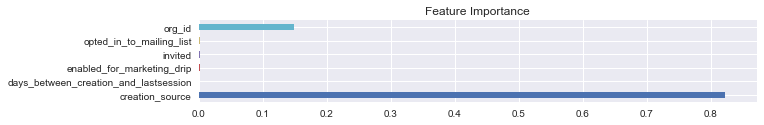

In [32]:
# find feature importance
feature_dict = dict(zip(DataSet_train.columns, final_model.feature_importances_))

#Summarize the encoded (dummy) columns
for col_name in ['org_id']:
    sum_value = sum(x for i, x in feature_dict.items() if col_name in i)
    keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
    for i in keys_to_remove:
        feature_dict.pop(i)
    feature_dict[col_name] = sum_value

results = pd.DataFrame(feature_dict,index=range(len(feature_dict))).loc[0,:]

#Plot feature importance
width=10
headroom=0.05
x_scale = final_model.feature_importances_.max()+ headroom
results.plot(kind='barh', figsize=(width,len(results)/4), xlim=(0,x_scale),title='Feature Importance')
plt.show()

* creation_source & org_id are the major factors that predict user adoption
* creation_source accounts for almost 82% and org_id 15% of whether the user will adopt or not
* This points to the possible ineffectiveness of current marketing approach, as regualr marketing email drips seems to have very little impact on user's adoption
* This gives the opportunity to think and try out some other marketing approaches
* Also, we can find out which user creation source & organization combination is doing well or worse in terms of user adoption and try to find out what is different about those cases Vs. others